<a href="https://colab.research.google.com/github/josedanielisidororeyes/Anal-tica-Descriptiva-y-Predictiva/blob/main/Practica_24_RegresionLinealMultiple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Maestría en Inteligencia Artificial y Analítica de Datos

## Programación para Analítica Descriptiva y Predictiva - Marzo 2025
## Práctica: Práctica: Regresión Lineal Múltiple
---


## Datos del Estudiante

*   Apellidos y Nombre: José Daniel Isidoro Reyes
*   Matrícula: 261551

---



##  Objetivo de aprendizaje
Al finalizar esta práctica, el estudiante será capaz de **aplicar regresión lineal múltiple utilizando Scikit-Learn para modelar la relación entre varias variables independientes y una variable dependiente**, verificar los supuestos del modelo, interpretar los coeficientes, analizar la correlación entre predictores y evaluar el rendimiento del modelo utilizando métricas como el MSE, RMSE y R².

Datos
Trabajarás con el archivo `advertising.csv`, que contiene información sobre el gasto publicitario en diferentes medios y las ventas obtenidas:

-`TV`: inversión en publicidad televisiva.

-`Radio`: inversión en publicidad en radio.

-`Newspaper`: inversión en publicidad en periódicos.

`Sales`: ventas del producto (variable dependiente).

## Parte 1: Carga de datos y bibliotecas
1. Importa las bibliotecas necesarias.
2. Carga el archivo `advertising.csv`.
3. Muestra las primeras filas del dataframe.
4. Describe estadísticamente las variables.

In [115]:
# Tu código aquí
from google.colab import drive
drive.mount('/content/drive')

# Carga de librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import sklearn.linear_model
import scipy.stats as stats
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import statsmodels.api as sm

#  Carga del conjunto de datos
df =  pd.read_csv("/content/drive/MyDrive/Programación Analítica Predictiva/advertising.csv")

# Impresión de las primera filas del dataset
print(df.head())

# Descripción estadística del dataset
df.describe()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9


,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


<p align = "Justify"

La estadística descriptiva sugiere que la variable Sales parece distribuirse bien, ya que la media es cerca a la media, y no existe mucha discrepancia por cuantiles. Por otra parte, la variable Newspaper parece exhibir sesgo positivo ya que el promedio es mayor a la mediana, lo cual puede atruibuirse a valores atípicos. La variables Radio y TV parecen tener distribuciones mejor comportadas, ya que el promedio y la mediana se encuentran cercanos además de que no existe mcha discrepancia por cuantiles.

## Parte 2: Análisis exploratorio de los datos
### 2.1  Análisis de la Relación Lineal entre la variable dependiente y las independientes
1. Grafica dispersión entre cada variable independiente (`TV`, `Radio`, `Newspaper`) y `Sales`. Usa también regplot.
2. Interpreta visualmente la relación entre variables.

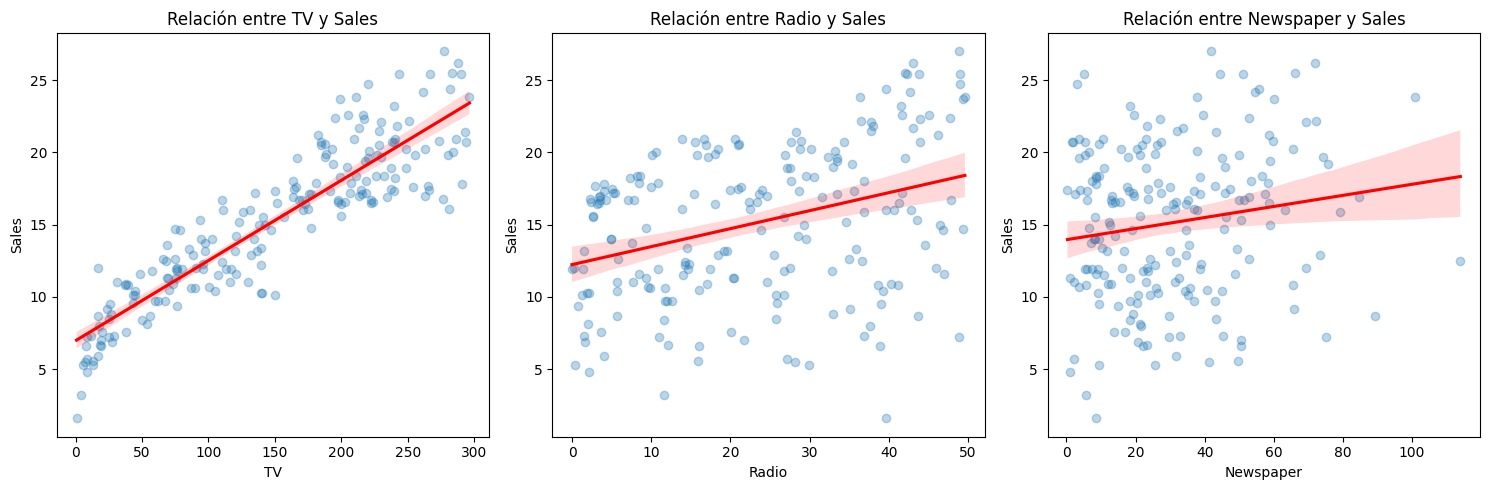

In [116]:
# Gráficos de dispersión
feature_cols = [col for col in df.columns if col != 'Sales']
n_features = len(feature_cols)

plt.figure(figsize=(n_features * 5, 5))
for i, col in enumerate(feature_cols):
    plt.subplot(1, n_features, i + 1)
    sns.regplot(x =  df[col], y =  df['Sales'], scatter_kws =  {'alpha': 0.3}, line_kws = {'color': 'red'})
    plt.title(f"Relación entre {col} y Sales")

plt.tight_layout()
plt.show()


<p align =  "Justify"

Del gráfico anterior, se observa que existe una fuerte relación líneal entre el gasto de publicidad  y las ventas. A medida que el aumento en publicidad aumenta, las ventas tambien lo hacen.

<p align =  "Justify"

Por lo que respecta a gasto en radio, se observa una relación positiva entre la inversión en este medio con las ventas. En este caso, la relaión parace ser más débil ya que existe mayor dispersión alrededor de la línea de regresión.

<p align =  "Justify"

Finalmente, la inversión en periódico parace estar correlacionada positivamente con las ventas, aunque la relación no está clara, y el hecho de que la línea de regresión sugiera una correlación positiva, requiere mayor investigación (posible influencia de valores atípicos).

### 2.2: Correlación entre variables
1. Calcula la matriz de correlación.
2. Visualízala con un heatmap.
3. Responde: ¿Qué variables están más correlacionadas con `Sales`? ¿Hay correlación alta entre predictores?

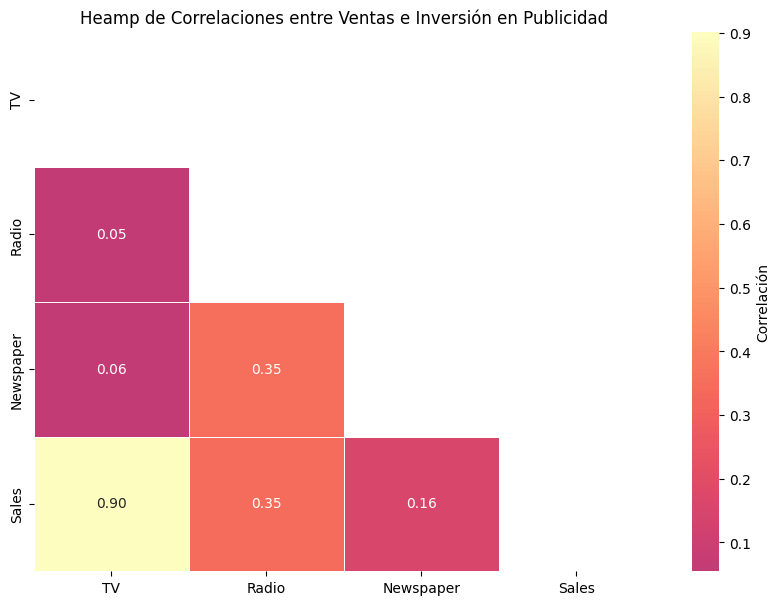

In [117]:
# Correlación y heatmap

# Matrix de correlación
m_corr =  df.corr()

# Mascara para evitar redundante
mask =  np.triu(np.ones_like(m_corr, dtype  = 'bool'))

plt.figure(figsize =  (10, 7))
sns.heatmap(
    m_corr,
    mask =  mask,
    cmap  = "magma",
    annot  =  True,
    fmt =  ".2f",
    linewidths =  0.5,
    center =  0,
    cbar_kws = {'label': 'Correlación'}
)
plt.title("Heamp de Correlaciones entre Ventas e Inversión en Publicidad")
plt.show()

<p align =  "Justify"

El heatmap de correlaciones confirma los hallazgos realizados con los gráficos de dispersión. La inversión en televisión está fuertemente correlacionada con las ventas. Por otra parte, la inversión en radio y periodicos tiene una correlación positiva baja con las ventas. Lo anterior sugiere que la inversión en TV   puede ser mejor inversión, aunque depende de la estrategia del negocio, tal vez está invirtiendo en estos medios menos rentables para incrementar su presencia de marca.

## Parte 3. Multicolinealidad
1. Calcula el VIF (Variance Inflation Factor) para cada predictor.
2. Crea un diagrama de barras  para mostrar el  VIF
3. Interpreta si hay multicolinealidad:
- ¿Alguna variable tiene un VIF mayor a 5 o mayor a 10?
- ¿Qué implicaciones tiene esto para el modelo?

/tmp/ipython-input-739623311.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x  = 'VIF', y = 'Variable', data =  vif_data, palette =  "coolwarm")


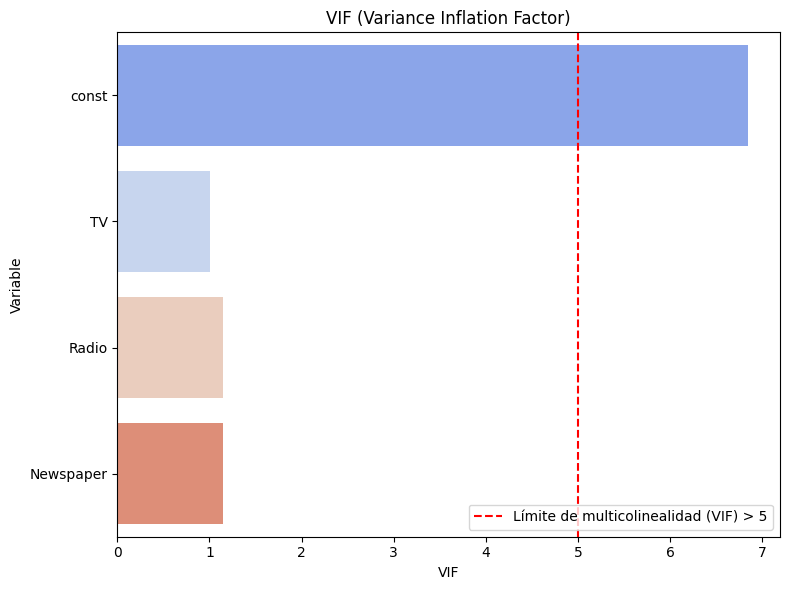

In [118]:
#Multicolinealidad
X =  add_constant(df.drop(columns  =  ['Sales'])) # Matriz de características sin la variable dependiente
vif_data =  pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Visualización del VIF
plt.figure(figsize =  (8, 6))
sns.barplot(x  = 'VIF', y = 'Variable', data =  vif_data, palette =  "coolwarm")
plt.axvline(x =  5, color = 'red', linestyle  = "--", label = 'Límite de multicolinealidad (VIF) > 5')
plt.title("VIF (Variance Inflation Factor)")
plt.legend(loc  = "lower right")
plt.tight_layout()
plt.show()

<p align = "Justify"

El gráfico anterior sugiere que no hay problema de multicolinealidad entre la variables. Esto es soportado por el análisis de correlación realizado, pues no existía fuerte correlación entre las variables predictoras.

## Parte 4: Construcción del Modelo (Todas las variables Independientes), Evaluación

### 4.1 Entrenamiento del Modelo (Todas las Variables Independientes)

1. Entrena un modelo de regresión lineal múltiple usando TV, Radio y Newspaper como variables independientes.
2. Imprime el intercepto y los coeficientes del modelo.
3. Interpreta cada uno:
¿Qué significa cada uno de los coeficientes  en términos de ventas?

In [119]:
#ntrenamiento del Modelo (Todas las Variables Independientes)

# Definición de variables independientes y dependientes
X =  df.drop(columns = "Sales")
y = df["Sales"]

# Selección de modelo de regresión lineal
model = sklearn.linear_model.LinearRegression()

# Entranmiento del modeo
model.fit(X, y)

# Impresión de intercepto y coeficientes
print(f"Intercepto: {model.intercept_}")
print("-----------------------------")

# Impresión de coeficienntes
coeficientes =  pd.Series(model.coef_, index=  X.columns)
print("---Coeficientes---")
print(coeficientes)


Intercepto: 4.625124078808653
-----------------------------
---Coeficientes---
TV           0.054446
Radio        0.107001
Newspaper    0.000336
dtype: float64


<p align =  "Justify"

El intercepto  indica que las ventas son 4.62 unidades cuando la inversíon en publicidad es 0. Sorprendentemente, la inversión en radio parece tener un efecto mayor sobre las ventas, esto es, por cada incremento de una unidad de inversión en radio se espera un incremento de las ventas de 0.10 unidades en promedio. En segundo lugar, se encuentra la variable TV que indica que por cada incremento de inversión de una unidad en TV las ventas incrementan en 0.054 unidades manteniendo todo los demás constante. Finalmente, el coeficiente de la inversión de periodicos es la más baja, y sugiere un efecto casi nulo sobre las ventas. En lo personal, eliminaría la variable Newspaper del modelo, y revisaría si los coeficientes son estadísticamente significativos.

### 4.2 Normalidad de los residuos

1. Calcula los residuos: residuos = y - y_pred.

2. Grafica un histograma con KDE de los residuos.

3. ¿Los residuos parecen distribuirse normalmente?

Text(0.5, 0, 'Residuos (Valor Real - Valor Predicho)')

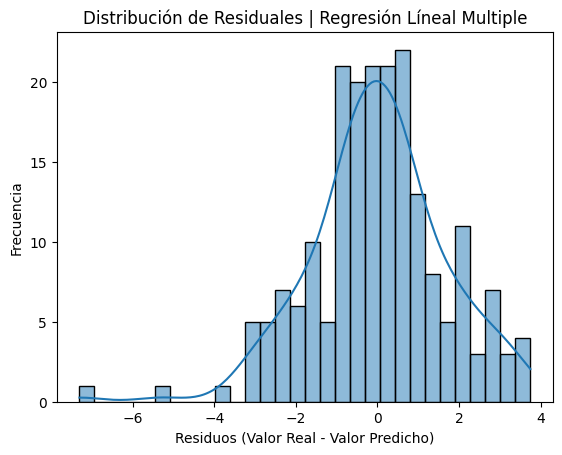

In [120]:
#Normalidad de los residuos

# Obtención de predicciones
y_pred  =  model.predict(X)

# Obtención de los residuos
residuos  =  y - y_pred

# Histograma de los residuos
sns.histplot(residuos, kde  =  True, bins  =  30)
plt.title("Distribución de Residuales | Regresión Líneal Multiple")
plt.ylabel('Frecuencia')
plt.xlabel('Residuos (Valor Real - Valor Predicho)')


<p align = "Justify"

La distribución de los residuales es simétrica, aunque se observa una cola de residuales negagativos probablablemene causado oor valores atípicos. La inspección visual no es concluyente y se sugiere utilizar una prueba estadística de normalidad como Shapiro-Wilk o Jarque Bera.

### 4.3. Homocedasticidad

1. Grafica los residuos contra los valores predichos.
2. ¿Observas patrones? ¿Los residuos se dispersan aleatoriamente?

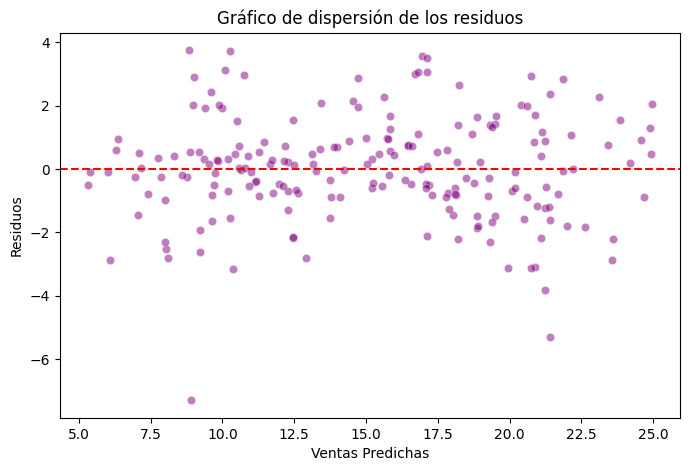

In [121]:
# Homocedasticidad
plt.figure(figsize =  (8, 5))
sns.scatterplot(x =  y_pred, y =  residuos, alpha  =  0.5, color  = "purple")
plt.axhline(y = 0, color  = 'r', linestyle  = "--")
plt.xlabel("Ventas Predichas")
plt.ylabel('Residuos')
plt.title("Gráfico de dispersión de los residuos")
plt.show()

<p align = "Justify"

Los residuales parecen distribuirse alrededor de 0. Se podria argumentar que existe mayor dispersión para valores altos de ventas. La inspección visual no es concluyente, y se recomienda realizar una prueba estadística para descartar la presencia de heterocedasticidad.

### 4.4 Q-Q Plot

1. Graficar el Q-Q Plot
2. Interpreta el gráfico: a) Si los puntos se alinean aproximadamente sobre la línea diagonal, los residuos siguen una distribución normal, b) Desviaciones sistemáticas indican asimetría o colas pesadas.

Text(0.5, 1.0, 'Q-Q Plot de los Residuos | Regresión Lineal Múltiple')

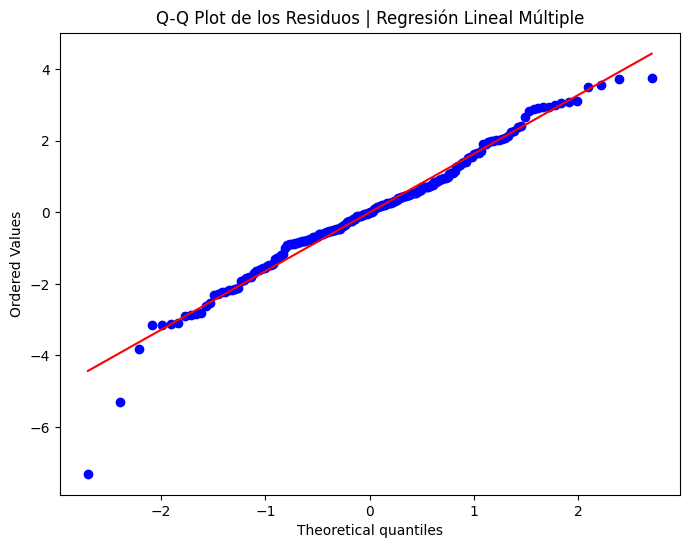

In [122]:
#Q-Q Plot
plt.figure(figsize = (8, 6))
stats.probplot(residuos, dist = "norm", plot  =  plt)
plt.title("Q-Q Plot de los Residuos | Regresión Lineal Múltiple")

<p align = "Justify"

El gráfico  QQ sugiere que los residuales no son perfectamente normales. En general se sospecha que los residuales no se distribuyen normalmente, aunque una limpieza de valores atípicos podría solucionar el problema.

### 4.5. Evaluación del Modelo

1. Calcula las métricas: a) MSE (error cuadrático medio), b) RMSE (raíz del error cuadrático medio), c) R² (coeficiente de determinación)

2. ¿Qué nos dicen estas métricas sobre el ajuste del modelo?


In [123]:
#Evaluación del Modelo
mse =  mean_squared_error(y, y_pred)
rmse =  np.sqrt(mse)
r2 =  r2_score(y, y_pred)

# Impresión de métricas de evaluación
print(f"Error cuadrático medio (MSE): {mse:.4f}")
print(f"Raíz error cuadrático medio (RMSE): {rmse:.4f}")
print(f"Coeficiente de determinación (R²): {r2:.4f}")

Error cuadrático medio (MSE): 2.7060
Raíz error cuadrático medio (RMSE): 1.6450
Coeficiente de determinación (R²): 0.9026


<p align = "Justify"

El error cuadrático medio es 2.706 y no tiene mucha interpretación a menos que se comparte con otros modelo. Por otro lado,  la raíz de error cuadrático medio nos indica que las predicciones tienen un error de 1.64 unidades respecto a los valores reales. Finalmente, el coeficiente de determinación sugiere un ajuste muy bueno, ya que el aproximadamente 90.26% de las variaciones de las ventas alrededor de su media son predichos por el modelo.

### 4.6. Visualización de Predicciones

1. Crea un gráfico comparando Sales reales vs Sales predichas.

2. Puedes usar plt.scatter(y_true, y_pred) para evaluar visualmente el ajuste.
3.¿Qué observas?¿Qué observas? ¿Qué información puedes obtener de esta gráfica?

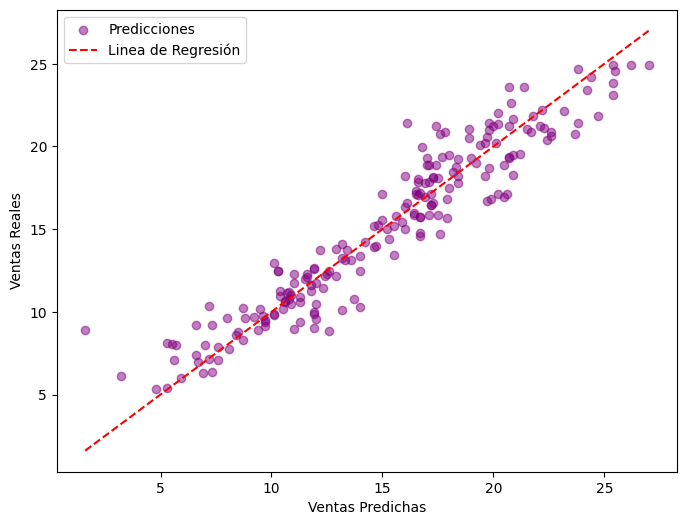

In [124]:
#Visualización de las Predicciones
plt.figure(figsize =  (8, 6))
plt.scatter(y, y_pred, color  = "purple", label  = "Predicciones", alpha  =  0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color  = "red", linestyle  = "--", label  = "Linea de Regresión")
plt.ylabel("Ventas Reales")
plt.xlabel("Ventas Predichas")
plt.legend()

### 4.7 Verificar el impacto de los atributos en el modelo

1. Ajusta el modelo usando statsmodels en lugar de scikit-learn para obtener los valores p.
2. Interpreta los resultados:

 - Observa los valores P>|t| en la tabla de salida.

 - ¿Qué variables tienen p-value menores a 0.05?

 - ¿Cuál es la conclusión sobre esas variables?


In [125]:
#P-values
X_constante =  sm.add_constant(X)

# Ajuste del modelo de regresión con statsmodels
model_sm =  sm.OLS(y, X_constante).fit()

# Impresión del resumen del modelo
print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     605.4
Date:                Sat, 01 Nov 2025   Prob (F-statistic):           8.13e-99
Time:                        21:08:49   Log-Likelihood:                -383.34
No. Observations:                 200   AIC:                             774.7
Df Residuals:                     196   BIC:                             787.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6251      0.308     15.041      0.0

<p align =  "Justify"

Se observa que el intercepto, TV, y Radio son estadísticamente significativos incluso al 1% de significancia. Por el contrario, la variable Newspaper no es estadísticamente significativa ni al 10% de significancia, ya que el valor p es mayor a 0.10. En general el modelo es estadísticamente significativo ya que el valor P del F-statistic es muy pequeño, aunque yo preferiría eliminar Newspaper del modelo.

##Parte 5:  Construcción del Modelo (sin Multicolinealidad), Evaluación

En el caso de que hayas detectado variables con multicolinealidad. Elimina aquellas que presenten esta característica y realiza los mismos pasos** que la parte 4.**
Escribe cada una de las subsecciones similares a las existentes en la Parte 4.

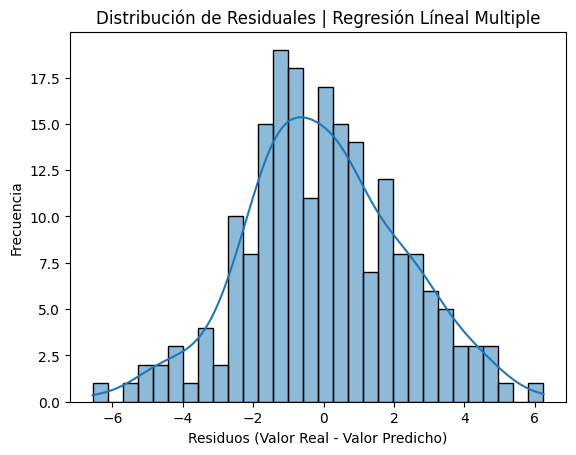

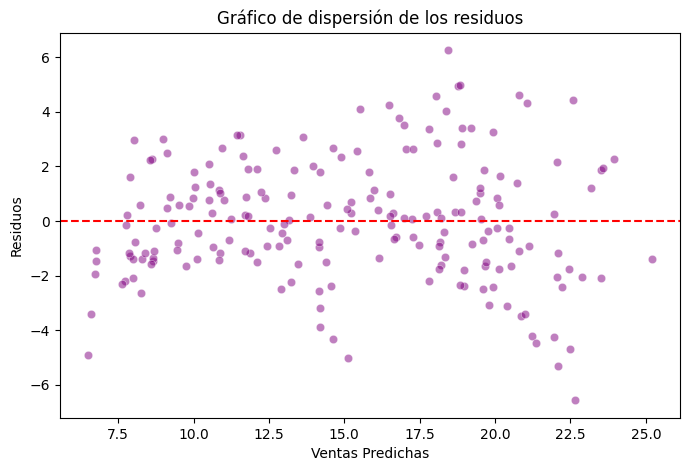

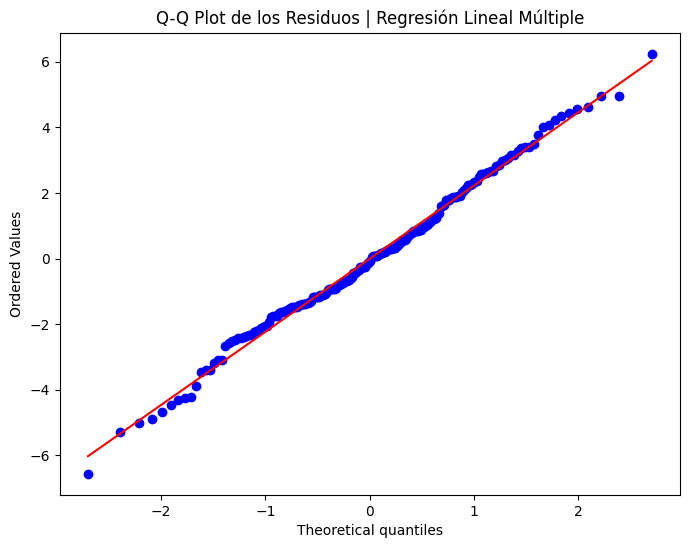

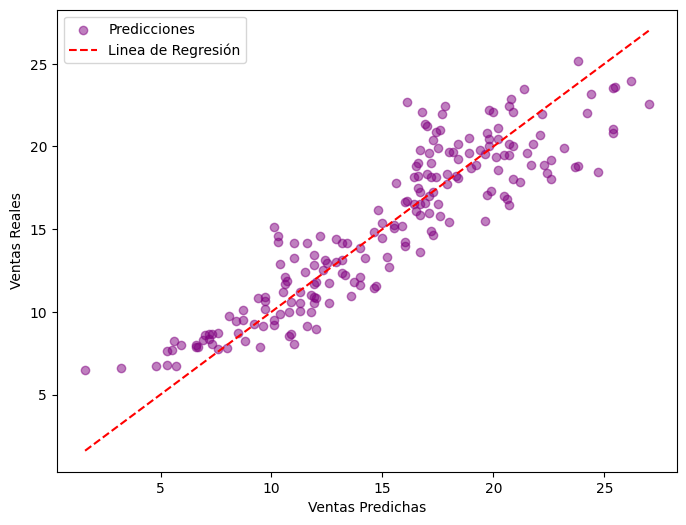

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     460.0
Date:                Sat, 01 Nov 2025   Prob (F-statistic):           5.89e-75
Time:                        21:08:49   Log-Likelihood:                -442.70
No. Observations:                 200   AIC:                             891.4
Df Residuals:                     197   BIC:                             901.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.2347      0.375     16.607      0.0

In [126]:
# Definición de variables independientes y dependientes
X =  df.drop(columns = ["Sales", "Radio" ])
y = df["Sales"]

# Selección de modelo de regresión lineal
model = sklearn.linear_model.LinearRegression()

# Entranmiento del modeo
model.fit(X, y)

#Normalidad de los residuos

# Obtención de predicciones
y_pred  =  model.predict(X)

# Obtención de los residuos
residuos  =  y - y_pred

# Histograma de los residuos
sns.histplot(residuos, kde  =  True, bins  =  30)
plt.title("Distribución de Residuales | Regresión Líneal Multiple")
plt.ylabel('Frecuencia')
plt.xlabel('Residuos (Valor Real - Valor Predicho)')
plt.show()

# Homocedasticidad
plt.figure(figsize =  (8, 5))
sns.scatterplot(x =  y_pred, y =  residuos, alpha  =  0.5, color  = "purple")
plt.axhline(y = 0, color  = 'r', linestyle  = "--")
plt.xlabel("Ventas Predichas")
plt.ylabel('Residuos')
plt.title("Gráfico de dispersión de los residuos")
plt.show()

#Q-Q Plot
plt.figure(figsize = (8, 6))
stats.probplot(residuos, dist = "norm", plot  =  plt)
plt.title("Q-Q Plot de los Residuos | Regresión Lineal Múltiple")
plt.show()


#Visualización de las Predicciones
plt.figure(figsize =  (8, 6))
plt.scatter(y, y_pred, color  = "purple", label  = "Predicciones", alpha  =  0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color  = "red", linestyle  = "--", label  = "Linea de Regresión")
plt.ylabel("Ventas Reales")
plt.xlabel("Ventas Predichas")
plt.legend()
plt.show()

#P-values
X_constante =  sm.add_constant(X)

# Ajuste del modelo de regresión con statsmodels
model_sm =  sm.OLS(y, X_constante).fit()

# Impresión del resumen del modelo
print(model_sm.summary())


<p align =  "Justify"

Para realizar este paso, se decidió eliminar la variable Radio, aunque considero que no existía un problema fuerte de multicolinealidad ya que la correlación entre TV y Radio es baja. Adicionalmente el análisis del VIF mostraba valores menores a 5, por lo tanto se descarta un problema grave de multicolinealidad en el modelo.

<p align =  "Justify"

Por otra parte, este nueva versión del modelo sugiere que los residuales se distribuyen normalmente, veanse los gráficos de dispersión y QQ de los residuales. Esto es soportado por los valores Prob(Omnibus) y Prob(Jarque-Bera (JB)) que son mayores a 5%. Por lo tanto concluimos, que hay evidencia suficiente para no rechazar la hipótesis nula de normalidad de los residuales. Finalmente, observamos que todos los coeficientes son estadísticamente significativos, aunque a consta de tener un modelo con menor capacidad predictiva (coeficiente de determinación  de 82.4%.

## Parte 6: Construcción del Modelo (sin variables que no muestran una relación lineal), Evaluación

En el caso de que hayas detectado variables sin una relación lineal con la variable dependiente. Elimina aquellas que presenten esta característica y realiza lo siguiente.

En el caso de que hayas detectado variables sin una relación lineal. Elimina aquellas que presenten esta característica y realiza los mismos pasos** que la parte 4.**
Escribe cada una de las subsecciones similares a las existentes en la Parte 4.

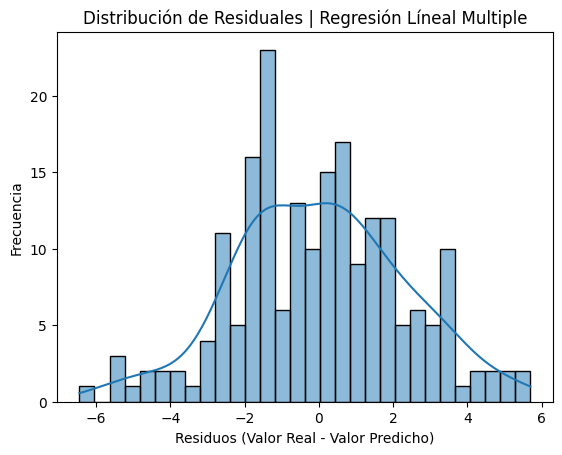

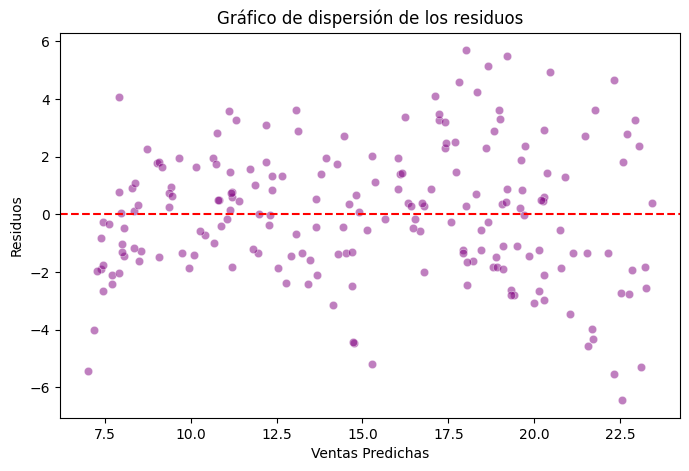

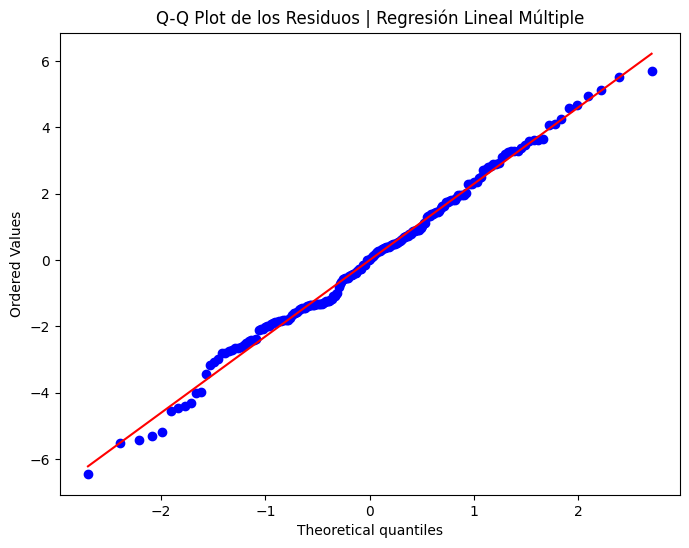

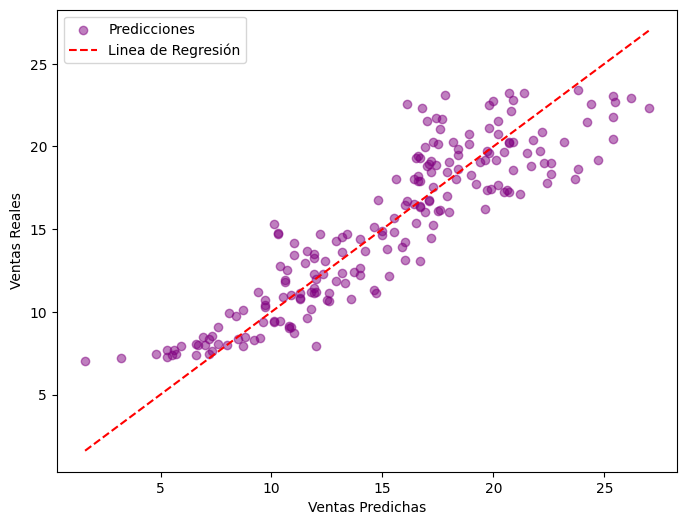

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     856.2
Date:                Sat, 01 Nov 2025   Prob (F-statistic):           7.93e-74
Time:                        21:08:50   Log-Likelihood:                -448.99
No. Observations:                 200   AIC:                             902.0
Df Residuals:                     198   BIC:                             908.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9748      0.323     21.624      0.0

In [127]:
# Definición de variables independientes y dependientes
X =  df.drop(columns = ["Sales", "Radio", "Newspaper"])
y = df["Sales"]

# Selección de modelo de regresión lineal
model = sklearn.linear_model.LinearRegression()

# Entranmiento del modeo
model.fit(X, y)

#Normalidad de los residuos

# Obtención de predicciones
y_pred  =  model.predict(X)

# Obtención de los residuos
residuos  =  y - y_pred

# Histograma de los residuos
sns.histplot(residuos, kde  =  True, bins  =  30)
plt.title("Distribución de Residuales | Regresión Líneal Multiple")
plt.ylabel('Frecuencia')
plt.xlabel('Residuos (Valor Real - Valor Predicho)')
plt.show()

# Homocedasticidad
plt.figure(figsize =  (8, 5))
sns.scatterplot(x =  y_pred, y =  residuos, alpha  =  0.5, color  = "purple")
plt.axhline(y = 0, color  = 'r', linestyle  = "--")
plt.xlabel("Ventas Predichas")
plt.ylabel('Residuos')
plt.title("Gráfico de dispersión de los residuos")
plt.show()

#Q-Q Plot
plt.figure(figsize = (8, 6))
stats.probplot(residuos, dist = "norm", plot  =  plt)
plt.title("Q-Q Plot de los Residuos | Regresión Lineal Múltiple")
plt.show()

#Visualización de las Predicciones
plt.figure(figsize =  (8, 6))
plt.scatter(y, y_pred, color  = "purple", label  = "Predicciones", alpha  =  0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color  = "red", linestyle  = "--", label  = "Linea de Regresión")
plt.ylabel("Ventas Reales")
plt.xlabel("Ventas Predichas")
plt.legend()
plt.show()


#P-values
X_constante =  sm.add_constant(X)

# Ajuste del modelo de regresión con statsmodels
model_sm =  sm.OLS(y, X_constante).fit()

# Impresión del resumen del modelo
print(model_sm.summary())

<p align   = "Justify"

De nueva cuenta, este modelo sugiere que los residuales se distribuyen normalmente veanse los gráficos de dispersión  y QQ. El modelo explica alrededor del 81.2% de las variaciones de las ventas respecto a su promedio, lo cual es bastante alto considerando la naturaleza de datos de corte transversal. El intercepto y el coeficiente es estadísticamente significativo, y en modelo tambien es estadísticamente significativo en su conjunto. El estadístico Durbin-Watson es aproximadamente 2, lo cual indica que no hay violanción del supuesto de autocorrelación en los residuales.

##7. Conclusiones.

¿Cuál de los tres modelos construidos fue el mejor?

<p align = "Justify"

La elección del mejor modelo depende del uso que se le vaya a dar, desde un punto de vista predictivo, el mejor modelo sería el primero que incluye todas las variables independientes. Desde un punto de vista estadístico, el mejor modelo es el ultimo que elimina variables correlacionadas y relaciones no lineales, este último puede ser más adecuado para realizar pruebas de hipótesis y calcular intervalos de confianza.


¿Cuál fue el atributo que mas influencia tiene en las ventas?

<p align  =  "Justify"

Tomando en consideración los resultados del modelo completo, radio tiene el coeficiente más grande, seguido de TV y newspaper. Aunque, TV tiene la correlación más alta con ventas, y para mí es el predictor más fiable.